In [20]:
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import numpy as np

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import learning_curve

import seaborn as sns

sns.set(style="whitegrid")

In [21]:
df = pd.read_csv('/content/LinkedIn_jobs.csv')

df.head()

,Title,Job_URL,Company_URL,Company,Location,Actively Hiring,Date
0,\n \n Software Engineer\n ...,https://sa.linkedin.com/jobs/view/software-eng...,https://sa.linkedin.com/company/mozn?trk=publi...,\n Mozn\n,"\n Riyadh, Riyadh, Saudi Arabia\n ...",NaN,5/29/2023
1,\n \n Application Developer\...,https://sa.linkedin.com/jobs/view/application-...,https://sa.linkedin.com/company/tabadul?trk=pu...,\n Tabadul\n,"\n Riyadh, Saudi Arabia\n",\n Actively Hiring\n,6/13/2023
2,\n \n Software Engineering M...,https://sa.linkedin.com/jobs/view/software-eng...,https://sa.linkedin.com/company/sallaapp?trk=p...,\n Salla E-Commerce Platform\n ...,"\n Riyadh, Riyadh, Saudi Arabia\n ...",NaN,4/3/2023
3,\n \n Software Lead Develope...,https://sa.linkedin.com/jobs/view/software-lea...,https://sa.linkedin.com/company/saudi-tadawul-...,\n Saudi Tadawul Group\n,"\n Riyadh, Saudi Arabia\n",\n Actively Hiring\n,5/30/2023
4,\n \n Artificial Intelligenc...,https://sa.linkedin.com/jobs/view/artificial-i...,https://sa.linkedin.com/company/scai-sa?trk=pu...,\n SCAI | سكاي\n,"\n Riyadh, Saudi Arabia\n",NaN,6/12/2023


In [22]:
df.shape

(3895, 7)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3895 entries, 0 to 3894
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Title            3895 non-null   object
 1   Job_URL          3730 non-null   object
 2   Company_URL      3729 non-null   object
 3   Company          3729 non-null   object
 4   Location         3881 non-null   object
 5   Actively Hiring  2998 non-null   object
 6   Date             3881 non-null   object
dtypes: object(7)
memory usage: 213.1+ KB


In [24]:
df.describe()

,Title,Job_URL,Company_URL,Company,Location,Actively Hiring,Date
count,3895,3730,3729,3729,3881,2998,3881
unique,1731,3730,432,431,103,3,134
top,\n \n Head Cyber Security Op...,https://sa.linkedin.com/jobs/view/software-eng...,https://id.linkedin.com/company/matchatalent?t...,\n MatchaTalent\n,"\n Riyadh, Riyadh, Saudi Arabia\n ...",\n Actively Hiring\n,6/7/2023
freq,227,1,338,338,1320,1981,303


In [25]:
df.duplicated().sum()

40

In [26]:
df.isnull().sum()

Title                0
Job_URL            165
Company_URL        166
Company            166
Location            14
Actively Hiring    897
Date                14
dtype: int64

In [27]:
df = df.dropna()
df.count()

Title              2920
Job_URL            2920
Company_URL        2920
Company            2920
Location           2920
Actively Hiring    2920
Date               2920
dtype: int64

In [28]:
print(df.isnull().sum())

Title              0
Job_URL            0
Company_URL        0
Company            0
Location           0
Actively Hiring    0
Date               0
dtype: int64


In [29]:
df.dtypes

Title              object
Job_URL            object
Company_URL        object
Company            object
Location           object
Actively Hiring    object
Date               object
dtype: object

In [30]:
df.columns

Index(['Title', 'Job_URL', 'Company_URL', 'Company', 'Location',
       'Actively Hiring', 'Date'],
      dtype='object')

In [31]:
df.count()

Title              2920
Job_URL            2920
Company_URL        2920
Company            2920
Location           2920
Actively Hiring    2920
Date               2920
dtype: int64

In [32]:
df['Title'].unique()

array(['\n            \n        Application Developer\n      \n          ',
       '\n            \n        Software Lead Developer - Java \n      \n          ',
       '\n            \n        Senior Web Developer\n      \n          ',
       ...,
       '\n            \n        Process Engineers - Steam Cracker Specialist\n      \n          ',
       '\n            \n        TPE III / Process Engineer\n      \n          ',
       '\n            \n        TPE IV / Senior Process Engineer\n      \n          '],
      dtype=object)

In [33]:
print(df['Date'].unique())

['6/13/2023' '5/30/2023' '6/8/2023' '6/11/2023' '5/24/2023' '6/4/2023'
 '6/7/2023' '6/6/2023' '5/29/2023' '5/2/2023' '6/5/2023' '6/14/2023'
 '5/16/2023' '5/22/2023' '6/15/2023' '6/2/2023' '6/12/2023' '5/23/2023'
 '5/17/2023' '5/10/2023' '5/26/2023' '5/18/2023' '4/16/2023' '6/3/2023'
 '5/11/2023' '4/27/2023' '5/21/2023' '5/15/2023' '4/6/2023' '5/4/2023'
 '5/5/2023' '6/1/2023' '5/31/2023' '6/9/2023' '4/3/2023' '4/26/2023'
 '4/19/2023' '5/27/2023' '3/28/2023' '4/24/2023' '5/8/2023' '5/3/2023'
 '5/25/2023' '5/9/2023' '4/18/2023' '3/30/2023' '5/12/2023' '4/22/2023'
 '4/8/2023' '4/11/2023' '5/28/2023' '5/14/2023' '5/6/2023' '4/28/2023'
 '4/1/2023' '3/16/2023' '5/13/2023' '3/17/2023' '5/1/2023' '3/29/2023'
 '5/20/2023' '4/12/2023' '4/20/2023' '6/10/2023' '4/17/2023' '3/26/2023'
 '4/5/2023' '12/13/2022' '2/24/2023' '4/21/2023' '5/7/2023' '5/19/2023'
 '4/7/2023' '4/25/2023' '2/22/2023' '4/2/2023' '2/3/2023' '3/7/2023'
 '3/27/2023' '3/20/2023' '4/4/2023' '3/24/2023' '3/31/2023'
 '\n            \

In [34]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

In [35]:
df['Title'] = df['Title'].str.replace(r'\n', '').str.strip()

df['Company'] = df['Company'].str.replace(r'\n', '').str.strip()

df['Location'] = df['Location'].str.replace(r'\n', '').str.strip()
df['Location'] = df['Location'].str.replace('Saudi Arabia', '').str.strip()


df['Actively Hiring'] = df['Actively Hiring'].str.replace(r'\n', '').str.strip()
df['Date'] = pd.to_datetime(df['Date'])
df['Actively Hiring'] = df['Actively Hiring'].replace('Be an early applicant', 'Not actively hiring')  # Replace with more meaningful value

df = df[~df['Actively Hiring'].str.contains('resultbenefit_text')]

<ipython-input-35-6d120ab47820>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Title'] = df['Title'].str.replace(r'\n', '').str.strip()
<ipython-input-35-6d120ab47820>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Company'] = df['Company'].str.replace(r'\n', '').str.strip()
<ipython-input-35-6d120ab47820>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Location'] = df['Location'].str.replace(r'\n', '').str.strip()
<ipython-input-35-6d120ab47820>:9: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Actively Hiring'] = df['Actively Hiring'].str.replace(r'\n', '').str.strip()


In [36]:
label_encoder = LabelEncoder()
df['Actively Hiring'] = label_encoder.fit_transform(df['Actively Hiring'])


X = df[['Title', 'Company', 'Location', 'Date']]
y = df['Actively Hiring']


X['DayOfWeek'] = pd.to_datetime(X['Date']).dt.dayofweek


X = X.drop(['Date'], axis=1)


X = pd.get_dummies(X, columns=['Title', 'Company', 'Location'], drop_first=True)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)


rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)


rf_classifier.fit(X_train_imputed, y_train)


y_pred = rf_classifier.predict(X_test_imputed)


accuracy = accuracy_score(y_test, y_pred)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

<ipython-input-36-1ea57ee6ffe4>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['DayOfWeek'] = pd.to_datetime(X['Date']).dt.dayofweek


Test Accuracy: 89.38%


Classification Report (Best Model):
               precision    recall  f1-score   support

           0       0.90      0.95      0.92       391
           1       0.88      0.78      0.83       193

    accuracy                           0.89       584
   macro avg       0.89      0.86      0.87       584
weighted avg       0.89      0.89      0.89       584



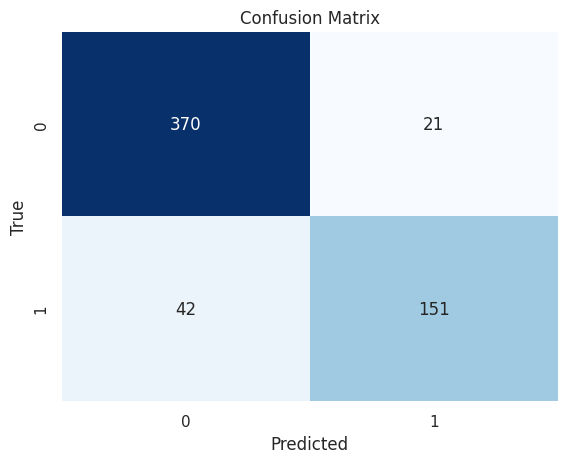

In [37]:
best_rf_model = RandomForestClassifier(
    max_depth=None,
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=200,
    random_state=42
)

best_rf_model.fit(X_train_imputed, y_train)

y_pred_best = best_rf_model.predict(X_test_imputed)

print("Classification Report (Best Model):\n", classification_report(y_test, y_pred_best))

conf_matrix_best = confusion_matrix(y_test, y_pred_best)
sns.heatmap(conf_matrix_best, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


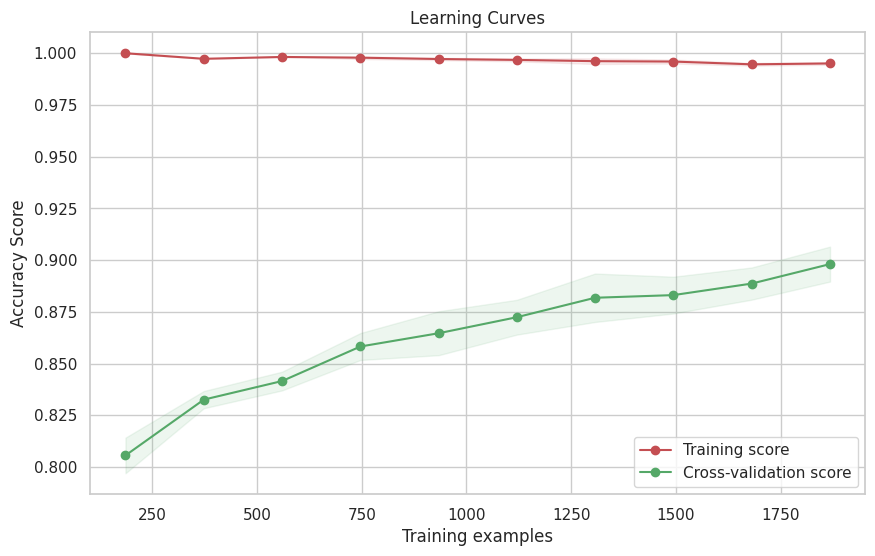

In [38]:
train_sizes, train_scores, test_scores = learning_curve(
    best_rf_model, X_train_imputed, y_train, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10)
)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Accuracy Score")
plt.legend(loc="best")
plt.title("Learning Curves")
plt.show()

In [39]:
df.to_excel('jobfinal.xlsx', index=False)